
# **This assignment involves tasks for feature engineering, training and evaluating a classifier for suggestion detection**



This assignment involves tasks for feature engineering, training and evaluating a classifier for suggestion detection. 


The CSV file contains a header row followed by 6,100 rows spread across 3 columns of data. Each row of data contains a unique id, a piece of text and a label assigned by an annotator. A label of  1  indicates that the given text contains a suggestion while a label of  0  indicates that the text does not contain a suggestion.

You can find more details about the dataset in Sections 1, 2, 3 and 4 of SemEval-2019 Task 9: Suggestion Mining from Online Reviews and Forums .

In [1]:
# !curl "https://raw.githubusercontent.com/pasricha/Subtask-A/master/Data.Assignment2.SemEvalTask9SubtaskA.csv" > Data.Assignment2.SemEvalTask9SubtaskA.csv

---

## Task 1: Reading Data 

The following cell of code reads the texts and the corresponding labels of suggestion/non-suggestion from the CSV file. The first task is to create training and test sets. Use the final $1000$ rows of the data as a test set and the rest of the data for training.

In [2]:
import numpy as np
import pandas as pd

# Read the CSV file.
df = pd.read_csv("https://raw.githubusercontent.com/pasricha/Subtask-A/master/Data.Assignment2.SemEvalTask9SubtaskA.csv", 
                 names=['id', 'text', 'label'], header=0)

# Set seed for reproducibility and shuffle the rows.
np.random.seed(888)
df = df.sample(frac=1).reset_index(drop=True)

# Store the data as a list of tuples where the first item is the text
# and the second item is the label.
data = [(text, label) for (idx, text, label) in df.values.tolist()]

# Create training and test sets.
train_texts, train_labels = [], []
test_texts, test_labels = [], []

#################### EDIT BELOW THIS LINE #########################

# your code goes here
train_number = data[:5100]
train_texts, train_labels = [text for text, label in train_number], [label for text, label in train_number]
test_numbers = data[5100:]
test_texts, test_labels = [text for text, label in test_numbers], [label for text, label in test_numbers]
#################### EDIT ABOVE THIS LINE #########################

# Check that training set and test set are of the right size.
assert len(test_texts) == len(test_labels) == 1000
assert len(train_texts) == len(train_labels) == 5100

---

## Task 2: Data Pre-processing 

Explain at least 3 steps that you will perform to preprocess the texts before training a classifier.


---

1.	Convert to Lower case

The lower casing is a general text processing technique. The Python language is case sensitive; therefore "language" and "Language" are two distinct terms. All of the input text is converted to the same case format, so "LanGUage," "LanGuaGE," and "language" are all treated the same. This allows you to group similar terms together, reducing repetition and ensuring consistency in text mining.

We'll utilize the lower() method for this. It lowercases each capital letter while keeping lowercase words the same.
2.	Removing Punctuations

The elimination of punctuation from the text is another text pre-processing approach. This again helps to treat “language” and “language!!!” in the same manner. This process is carried out with the string package. There are 32 punctuations in total. 

‘!"#$%&'()*+,-./:;<=>?@[]^_`{|}~'

Python has a string. punctuation constant that returns a long list of punctuated characters. When using the frequency of occurrence of words, not eliminating punctuation can have an impact on the result. Because we are using TF-IDF as a feature that is completely based on the frequency of occurrences, we removed the punctuations.
3.	Lemmatization

Different inflected forms of words are grouped into a single root base form through lemmatization. It's similar to stemming, but it adds the context of the words. For example, runs, running, ran are all forms of word run, therefore run is the lemma of all these words.

Python NLTK provides WordNetLemmatizer that uses a wordnet database to lookup for lemma words. It is necessary to provide the context in which you want to lemmatize. This context is given by part-of-speech. In suggestion detection, a grouping of words into a single root reduces the number of features which in turn reduces the processing time.




---

In [3]:
# your code goes here
import string
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

#---------------Converting training and test text into data frame--------------#
train_text_df = pd.DataFrame()
train_text_df["text"] = train_texts
test_text_df = pd.DataFrame()
test_text_df["text"] = test_texts

#---------------Convert to Lower case------------------------------------------#
train_text_df['text'] = train_text_df['text'].str.lower()
test_text_df['text'] = test_text_df['text'].str.lower()

#---------------Punctuation removal--------------------------------------------#
def remove_punctuations(text):
    for punctuation in string.punctuation:
      text = text.replace(punctuation, '')
    return text

train_text_df['text'] = train_text_df['text'].apply(remove_punctuations)
test_text_df['text'] = test_text_df['text'].apply(remove_punctuations)

#--------------Lemmatization---------------------------------------------------#
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word,pos='v') for word in text.split()])

train_text_df["text"] = train_text_df["text"].apply(lambda text: lemmatize_words(text))
test_text_df["text"] = test_text_df["text"].apply(lambda text: lemmatize_words(text))


train_text_df['text'] = train_text_df['text'].str.strip()
test_text_df['text'] = test_text_df['text'].str.strip()




[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


---

## Task 3: Feature Engineering (I) - TF-IDF as features


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import GaussianNB

# Calculate tf-idf scores for the words in the training set.
# ... your code goes here
X_train = train_text_df["text"]
y_train = train_labels
X_test = test_text_df["text"]
y_test = test_labels

count_vect = CountVectorizer()
tfidf_transformer = TfidfTransformer()

X_train_counts = count_vect.fit_transform(X_train) 
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

X_test_counts = count_vect.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)


# Train a Naïve Bayes classifier using the tf-idf scores for words as features.
# ... your code goes here
GNB_classifier_feature_tfidf = GaussianNB()
GNB_classifier_feature_tfidf.fit(X_train_tfidf.toarray(), y_train)


# Predict on the test set.
predictions = []    # save your predictions on the test set into this list

# ... your code goes here
predictions = GNB_classifier_feature_tfidf.predict(X_test_tfidf.toarray())

#################### DO NOT EDIT BELOW THIS LINE #################

def accuracy(labels, predictions):
  '''
  Calculate the accuracy score for a given set of predictions and labels.
  
  Args:
    labels (list): A list containing gold standard labels annotated as `0` and `1`.
    predictions (list): A list containing predictions annotated as `0` and `1`.

  Returns:
    float: A floating point value to score the predictions against the labels.
  '''

  assert len(labels) == len(predictions)

  correct = 0
  for label, prediction in zip(labels, predictions):
    if label == prediction:
      correct += 1 
  
  score = correct / len(labels)
  return score

# Calculate accuracy score for the classifier using tf-idf features.
accuracy(test_labels, predictions)

0.515

---

## Task 4: Evaluation Metrics

Why is accuracy not the best measure for evaluating a classifier? Describe an evaluation metric which might work better than accuracy for a classification task such as suggestion detection.




---

Accuracy is calculated as 
 
The accuracy score is determined by how well-balanced the data is. For instance, if we have a dataset with two classes, balanced data means we have 50% data for each class or even a range of 60% and 40% data that does not result in a substantial drop in performance. The dataset provided for text classification is imbalanced.  There are 4015 items with label 0 and 2085 with label 1. The accuracy score does not bring out the classification that we require because the dataset is unbalanced. As a result, we employ a precision score. 

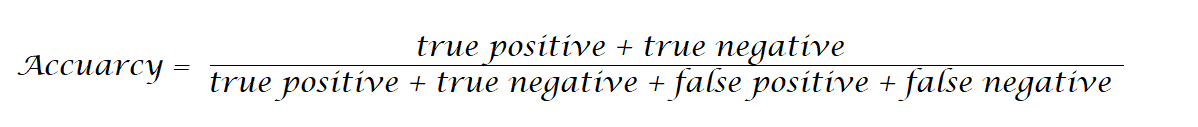
Precision score denotes the proportion of correctly identified positive classes among all predicated positive classes i.e. the proportion
of identification that was correct. 

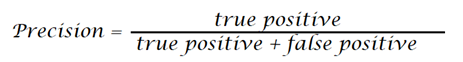


As a result, it calculates the minority class's accuracy. In the model given sentence with non-suggestion is classified as a suggestion.


---

In [5]:
def evaluate(labels, predictions):
  '''
  Calculate an evaluation score other than accuracy for a given set of predictions and labels.
  
  Args:
    labels (list): A list containing gold standard labels annotated as `0` and `1`.
    predictions (list): A list containing predictions annotated as `0` and `1`.

  Returns:
    float: A floating point value to score the predictions against the labels.
  '''

  # check that labels and predictions are of same length
  assert len(labels) == len(predictions)

  score = 0.0
  
  #################### EDIT BELOW THIS LINE #########################

  # your code goes here
  from sklearn.metrics import precision_score
  score=precision_score(y_test, predictions)

  #################### EDIT ABOVE THIS LINE #########################

  return score

# Calculate evaluation score based on the metric of your choice
# for the classifier trained in Task 3 using tf-idf features.
evaluate(test_labels, predictions)

0.4008941877794337

---

## Task 5: Feature Engineering (II) 

Describe features other than those defined in Task 3 which might improve the performance of your suggestion detector. If these features require any additional pre-processing steps, then define those steps as well.



---
For increasing the performance of the suggestion detector, we have used a TF-IDF vectorizer with bigram.

An N-gram is a collection of sequences of words in a sentence. Where N is a positive integer indicating the number of words in the sequence. N gram with N = 1 is called a unigram. Similarly, N = 2 is a bigram, and N = 3 is a trigram.

An N-gram is a type of language model which helps in finding the probability distribution over a word sequence. For example, the sentence is "This would be ease of use". If we consider N = 1, we would get the sequence as [‘This’, ‘would’, ‘be’, ‘ease’, ‘of’, ‘use’]. If N = 2, it will have a sequence of 2 words [‘This would’, ‘would be’, ‘be ease’, ‘ease of’, ‘of use’].

TF -IDF calculates the term frequency and inverse document frequency for a collection of raw documents and converts them into a TF- IDF feature matrix. This feature matrix is then used to train the model using a naive Bayes classifier. For example: "The store listings are not editable for all my applications." The features we obtain after computing the TF-IDF are "The", "store", "listings", "are", "not", "editable", "for", "all", "my", "applications".

The main flaw is that it does not take into consideration the context of words. Pairs of consecutive words may capture structure that isn't visible when counting single words, and they may provide context that helps tokens make more sense. For example, "San Francisco" represents a detailed meaning only when they are grouped together; "San" and "Francisco" do not provide a proper meaning. This can be accomplished by combining n-gram with TF -IDF to provide more helpful features for suggestion detection, as context or details of a sentence play an important role. Therefore, our sentence would now become "The store", "store listings", "listings are", "are not", "not editable", "editable for", "for all", "all my", "my applications".

Bigram enhances the likelihood of discovering two words that are similar, resulting in a higher TF - IDF score for features. This also aids the naive Bayes model in NLP to produce better probability outputs.
We are using TF-IDF vectorizer instead of CountVectorizer. With tfidfVecortizer, we pass the n_gram parameter to achieve better performance. We have passed 4 parameters in tfidfvectorizer.

1.	Analyzer = ‘word’
2.	Token pattern
3.	n_gram range: n_gram range(min_n,max_n) extracts the minimum and maximum range of n-values for various n-grams. Because we specified n_gram range = (2,2), it will be treated as a bigram.
4.	use_idf: By default, use_idf is set to true. This implies that the inverse document frequency weighing should be considered.

Without passing n-gram, we were able to attain a precision score of 40% using CountVectorizer. It has increased by more than 11% after using the TF-IDF vectorizer in conjunction with Bigram. As a result, it can be shown that grouping consecutive words together provides contextual meaning, which aids in determining whether a statement is a suggestion or not.


---

In [6]:
# Create your features.
# ... your code goes here
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import GaussianNB

tfidf_vect_ngram = TfidfVectorizer(analyzer='word',token_pattern=r'\w{1,}',ngram_range=(2,2),use_idf=True)
tfidf_vect_ngram.fit(train_text_df["text"])

X_train_tfidf_ngram =  tfidf_vect_ngram.transform(X_train)
X_test_tfidf_ngram =  tfidf_vect_ngram.transform(X_test)


# Train a Naïve Bayes classifier using the features you defined.
# ... your code goes here
NB_classifier_tfidf = GaussianNB()
NB_classifier_tfidf.fit(X_train_tfidf_ngram.toarray(), y_train)

# Evaluate on the test set.
# ... your code goes here
predictions = NB_classifier_tfidf.predict(X_test_tfidf_ngram.toarray())
print(evaluate(test_labels, predictions)) # calulate precision score

0.515
